# Office Supplies Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
off_data = pd.read_csv(r"C:\Users\lenovo\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P2- OfficeSupplies Data - Copy.csv")
off_data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [3]:
print(off_data.dtypes)

OrderDate      object
Region         object
Rep            object
Item           object
Units           int64
Unit Price    float64
dtype: object


In [4]:
off_data.shape

(43, 6)

# Sales Analysis

Sales for products

In [5]:
off_data["Sales"] = off_data["Units"]*off_data["Unit Price"]
off_data["Sales"].head()

0     309.38
1      57.71
2     686.95
3    1619.19
4    1005.90
Name: Sales, dtype: float64

- What are the total sales for each product category?

In [6]:
sales_by_item = off_data.groupby("Item")["Sales"].sum()
sales_by_item

Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Sales, dtype: float64

- Which product category has the highest sales?

In [7]:
highest_sales_Item = sales_by_item.idxmax()
highest_sales_amount = sales_by_item.max()

In [8]:
print("Item with highest sales is",highest_sales_Item,"with sales amount =",highest_sales_amount)

Item with highest sales is Binder with sales amount = 9577.65


   - Identify the top 10 best-selling products.

In [9]:
no_of_item = off_data["Item"].nunique()
no_of_item

5

In [10]:
top_3_item_sale = sales_by_item.nlargest(3)
top_3_item_sale

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Name: Sales, dtype: float64

# Customer Analysis

   - Who are the top 10 customers by sales?

In [11]:
Cust_by_sale = off_data.groupby("Rep")["Sales"].sum()
Cust_by_sale

Rep
Alex       2812.19
Bill       1749.87
James      1283.61
Matthew    3109.44
Morgan     1387.77
Nick        536.75
Rachel      438.37
Richard    2363.04
Smith      1641.43
Susan      3102.30
Thomas     1203.11
Name: Sales, dtype: float64

In [12]:
top_10_cust = Cust_by_sale.nlargest(10)
top_10_cust

Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Sales, dtype: float64

   - What is the total number of unique customers?

In [13]:
unique_cust = off_data["Rep"].nunique()
unique_cust

11

- Analyze customer purchase frequency.

In [14]:
cust_purchase_frequency = off_data['Rep'].value_counts()
cust_purchase_frequency

Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: Rep, dtype: int64

# Time Series Analysis

   - What are the monthly sales trends over the past year?

In [15]:
off_data["OrderDate"] = pd.to_datetime(off_data["OrderDate"])
monthly_sales_trends = off_data.set_index('OrderDate').resample('M')["Sales"].sum()

In [16]:
monthly_sales_trends

OrderDate
2014-07-31    2673.23
2014-08-31    2005.55
2014-09-30     666.11
2014-10-31    1984.57
2014-11-30     833.78
2014-12-31    3288.47
2015-01-31    1602.09
2015-02-28    2044.33
2015-03-31     556.87
2015-04-30    1059.03
2015-05-31    1300.35
2015-06-30    1613.50
Freq: M, Name: Sales, dtype: float64

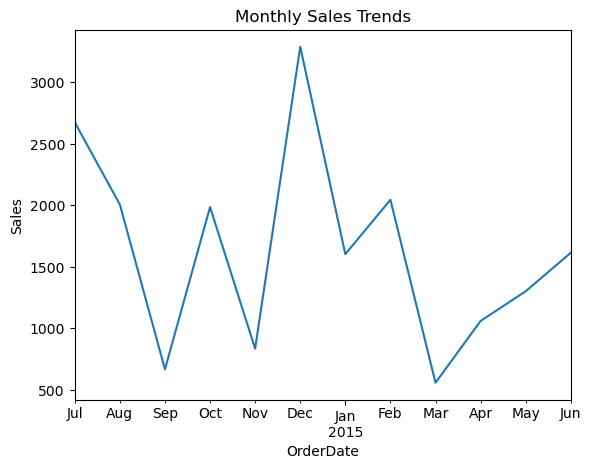

In [17]:
monthly_sales_trends.plot()

plt.xlabel('OrderDate')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends')

plt.show()

# Geographical Analysis

- Which regions generate the most sales?

In [18]:
sale_by_region = off_data.groupby("Region")["Sales"].sum()
sale_by_region

Region
Central    11139.07
East        6002.09
West        2486.72
Name: Sales, dtype: float64

In [19]:
max_sale_region = sale_by_region.idxmax()
max_sale_amt_region = sale_by_region.max()

In [20]:
print(max_sale_region,"is the region with max sale of amount =",max_sale_amt_region)

Central is the region with max sale of amount = 11139.07


   - What are the sales trends across different regions?

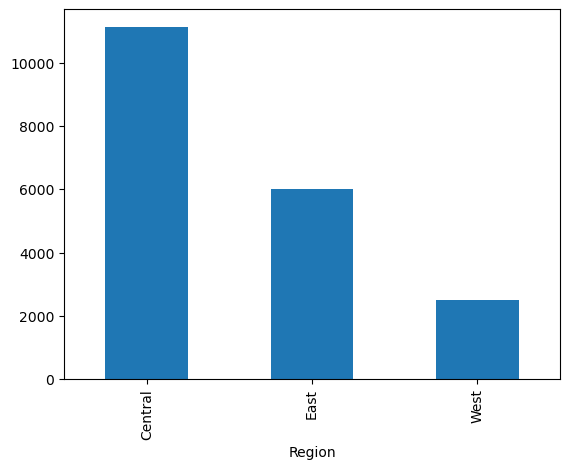

In [21]:
Region_sale_trend = sale_by_region.plot(kind= "bar")
plt.show()